# Clustering Based on Neural Networks in Wireless Sensor Networks

In [75]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import euclidean

---
## 4. Using Neural Networks for Clustering using SOM - Self Organizing Maps (Kohonen Neural Network)

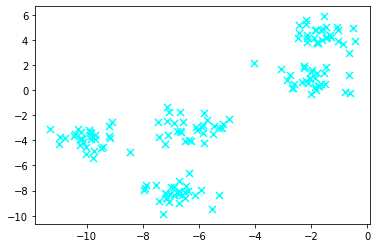

[0 0 2 1 3 2 0 0 4 3 4 3 4 1 4 3 4 3 4 2 1 3 1 3 2 3 1 1 2 1 0 0 2 1 4 1 2
 2 4 4 2 3 0 4 0 1 3 2 2 1 0 4 0 0 1 2 1 2 3 0 3 3 4 1 4 2 2 2 4 1 0 3 0 4
 3 3 1 2 0 0 3 2 1 1 2 0 3 2 4 3 2 4 4 4 4 4 2 2 0 3 1 4 3 1 0 1 0 1 0 2 4
 3 0 3 4 3 0 0 1 1 2 3 4 4 1 2 3 1 4 4 3 0 2 2 2 1 0 0 2 4 1 1 4 1 0 0 0 3
 3 3]


In [3]:
#sample wsn points
X,y = make_blobs(
    n_samples=150 ,n_features=2,
    centers=5,cluster_std=0.7,
    shuffle=True, random_state=1
)
# np.savetxt("../Dataset/blobs_dataset.csv",X,delimiter=",")
#plot of sample wsn points

plt.scatter(
    X[:,0],X[:,1],
    c='cyan',marker='x',
    edgecolors='black',s=50
)

plt.show()
print(y)

In [57]:
num_clust = 5
W = []
M = len(X)
N = len(X[0])

In [58]:
def get_weights():
    y = np.random.random() * (2.0/np.sqrt(M))
    return 0.5 - (1/np.sqrt(M)) + y

In [59]:
for i in range(num_clust):
    W.append(list())
    for j in range(N):
        W[i].append(get_weights()*0.5)

In [60]:
def distance(w, x): #euclid distance
    r = 0
    for i in range(len(w)):
        r = r + (w[i] - x[i])*(w[i] - x[i])
    
    r = np.sqrt(r)
    return r

In [61]:
def Findclosest(W, x):
    wm = W[0]
    r = distance(wm, x)
    
    i = 0
    i_n = i
    
    for w in W:
        if distance(w, x) < r:
            r = distance(w, x)
            wm = w
            i_n = i
        i = i + 1
    
    return (wm, i_n)

In [62]:
print(W)

[[0.24701492245322249, 0.2762578895080816], [0.2245118774263879, 0.2599847300146471], [0.2477307914921204, 0.2846691405954216], [0.22574086022205103, 0.2393966919342127], [0.23908350855312294, 0.22359748434996415]]


In [63]:
la = 0.25   # λ coefficient
dla = 0.06  # Δλ

while la >= 0:
    for k in range(10):
        for x in X:
            wm = Findclosest(W, x)[0]
            for i in range(len(wm)):
                wm[i] = wm[i] + la * (x[i] - wm[i]) 

    la = la - dla

In [64]:
final_clust = []
for x in X:
    c = Findclosest(W,x)[1]
    final_clust.append(c)
final_clust=np.array(final_clust)
print((final_clust))

[2 2 4 3 3 4 2 2 0 3 1 3 1 3 0 3 1 3 1 4 3 3 3 3 4 3 3 3 4 3 2 2 4 3 1 3 4
 4 0 0 4 3 2 1 2 3 3 4 4 3 2 1 2 2 3 4 3 4 3 2 3 3 1 3 1 4 4 4 1 3 2 3 2 1
 3 3 3 4 2 2 3 4 3 3 4 2 3 4 0 3 4 0 1 0 1 1 4 4 2 3 3 1 3 3 2 3 2 3 2 4 0
 3 2 3 1 3 2 2 3 3 4 3 0 1 3 4 3 3 1 1 3 2 4 4 4 3 2 2 4 0 3 3 1 3 2 2 2 3
 3 3]


In [70]:
y_pred = final_clust
y_pred

array([2, 2, 4, 3, 3, 4, 2, 2, 0, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 4, 3, 3,
       3, 3, 4, 3, 3, 3, 4, 3, 2, 2, 4, 3, 1, 3, 4, 4, 0, 0, 4, 3, 2, 1,
       2, 3, 3, 4, 4, 3, 2, 1, 2, 2, 3, 4, 3, 4, 3, 2, 3, 3, 1, 3, 1, 4,
       4, 4, 1, 3, 2, 3, 2, 1, 3, 3, 3, 4, 2, 2, 3, 4, 3, 3, 4, 2, 3, 4,
       0, 3, 4, 0, 1, 0, 1, 1, 4, 4, 2, 3, 3, 1, 3, 3, 2, 3, 2, 3, 2, 4,
       0, 3, 2, 3, 1, 3, 2, 2, 3, 3, 4, 3, 0, 1, 3, 4, 3, 3, 1, 1, 3, 2,
       4, 4, 4, 3, 2, 2, 4, 0, 3, 3, 1, 3, 2, 2, 2, 3, 3, 3])

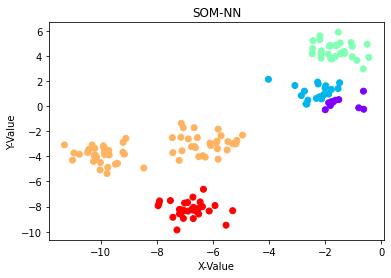

In [71]:
plt.scatter(X[:,0],X[:,1],c=final_clust,cmap = 'rainbow')
plt.title("SOM-NN")
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.savefig("som_nn.jpg")
plt.show()
# plt.legend()  

## Analysing Performance (Energy)


### 1. Finding Energy with Clustering

In [72]:
# assuming base station at point B(-6,6)
B = [-6.0,6.0]
B = np.array(B)



In [73]:
# Finding cluster heads
def find_clust_heads(points,preds,num_clusters):
    clust_heads = []
    for i in range(num_clusters):
        min_dist = 1000000000.0
        min_point = []
        for x in points[preds==i]:
            dist = euclidean(x,B)
            # print(dist)
            if dist < min_dist:
                # print(x)
                min_point = x
                min_dist = dist
                # print(min_point)
        clust_heads.append(min_point)
    return clust_heads




In [76]:
clust_heads_res = find_clust_heads(X,y_pred,5)
clust_heads_res = np.array(clust_heads_res)
print(clust_heads_res)

[[-1.63167312  0.46611433]
 [-4.01981002  2.13260485]
 [-2.42999333  5.20779647]
 [-7.12861685 -1.3742274 ]
 [-6.33770496 -6.62234235]]


In [77]:
# calculating distances of cluster nodes with cluster heads
def calcdist(heads,points,y_clust):
    # print(heads)
    # print(heads[0])
    num_heads = heads.size // 2
    num_points = points.size //2
    dist = []
    for i in range(num_points):
        y_c = y_clust[i]
        head = heads[y_c]
        # print(head,y_c,points[i])
        dist.append(euclidean(points[i],head))
    return dist


In [78]:
# Calculating Distances from Cluster Heads
node_distances = []
node_distances = calcdist(clust_heads_res,X,y_pred)
node_distances
        


[1.11636263904867,
 1.0462576717257297,
 1.3819005725041669,
 3.618125912252045,
 1.9128367582623587,
 1.8117766253650487,
 1.1246066086261035,
 1.8976505296937949,
 0.1750910073196088,
 2.542819774081702,
 2.387752853836902,
 2.453623578042319,
 2.404044153339395,
 3.3088256775256966,
 1.2346500562609686,
 2.9480865603556796,
 2.1126819531999064,
 2.0544899549446214,
 2.593208187019129,
 2.9698886163966174,
 2.570938169154498,
 1.9089742913496373,
 4.7067158023900095,
 0.3524143504697499,
 2.359974098435565,
 2.8239424322802793,
 3.9090446007488016,
 4.508146856593215,
 3.370253865457973,
 4.251601046267678,
 1.4849750314092212,
 0.8914516490058436,
 1.3583244722243293,
 3.699128787227621,
 2.377950695704568,
 3.098521333316369,
 2.121491757200747,
 1.6547183611134317,
 0.4565113101007006,
 0.13257925663288184,
 2.132060498073574,
 1.9971674583949213,
 0.7363818890701486,
 1.067559208660519,
 1.471882634412633,
 4.067612238805377,
 1.8770031620311145,
 1.8243714290271957,
 1.507442605

In [79]:
head_distances = []
for i in range(clust_heads_res.size//2):
    dist = euclidean(clust_heads_res[i],B)
    mult = y_pred[y_pred==i].size
    head_distances.append(dist*mult*0.80)

head_distances

[56.40208241341404,
 69.51792424814873,
 87.76434139567459,
 358.08452269261295,
 303.0446187373082]

In [80]:
# Finding Total Energy Required

energy = sum(head_distances)+sum(node_distances)

print("Energy with clustering =",energy)

Energy with clustering = 1186.8801353282631


In [81]:
energy_without = 0.0

for point in X:
    energy_without+=euclidean(point,B)
print("Energy without clustering =",energy_without)

Energy without clustering = 1355.5424921882948


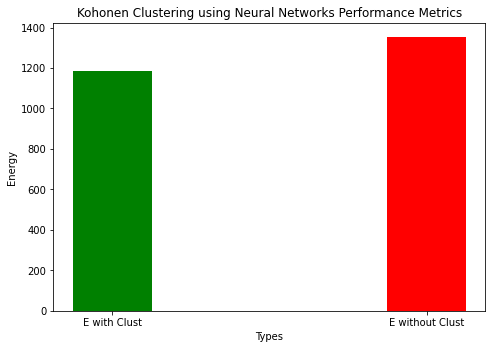

In [91]:
# Plotting the energies
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ens = ['E with Clust','E without Clust']
vals = [energy,energy_without]
ax.bar(ens,vals,width=0.25,color=('green','red'))
plt.xlabel("Types")
plt.ylabel("Energy")
plt.title('Kohonen Clustering using Neural Networks Performance Metrics')
plt.savefig("../Performance/wsn_clust_kohonen_nn_perf.jpg",bbox_inches = "tight")
plt.show()